In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
df = pd.read_csv("DataSet/data.csv",encoding = "ISO-8859-1")

In [18]:
print (df.duplicated().sum())    
df.drop_duplicates(inplace = True)
df.shape   #(536641, 8)

5268


(536641, 8)

In [21]:
df.dropna(axis = 0, subset =['CustomerID'], inplace = True)
df.shape #(406829, 8)
print (pd.DataFrame(df.isnull().sum()))

             0
InvoiceNo    0
StockCode    0
Description  0
Quantity     0
InvoiceDate  0
UnitPrice    0
CustomerID   0
Country      0


In [22]:
df = df[(df.InvoiceNo).apply(lambda x:( 'C' not in x))]
df.shape    #(392732, 8)
df_customerid_groups=df.groupby("CustomerID")
print (len((df_customerid_groups.groups))) #length of dictionary - 4339

4339


In [28]:
df_cluster=pd.DataFrame(columns=['Quantity','UnitPrice','CustomerID'])
count=0
for k,v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['Quantity'].sum()), v['UnitPrice'].sum(), k]
    count+=1
df_cluster.shape  #(4339, 3)
# Applying K-Means Clustering Algorithm
# We use only 'Quantity','UnitPrice' columns to cluser 
X = df_cluster.iloc[:, [0, 1]].values

(4339, 3)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)
#Using the Elbow method to find the optical number of clusters
from sklearn.cluster import KMeans
wcss = [] #With in cluster sum of squers(Inertia)

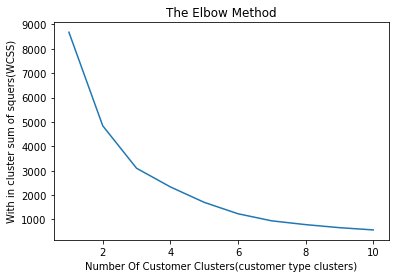

In [31]:
for i in range(1,11): #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('With in cluster sum of squers(WCSS)')
plt.show()

In [36]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

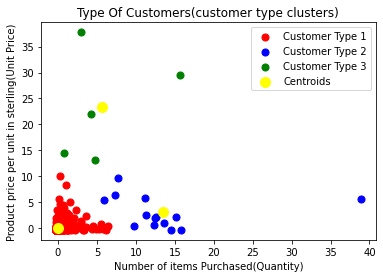

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()

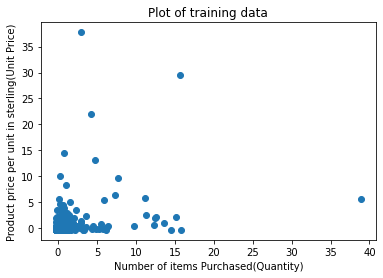

In [35]:
x=[];y=[]
for i in range(4339):
    x.append(X[i][0])
    y.append(X[i][1])
plt.scatter(x,y)
plt.title('Plot of training data')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.show()

In [43]:
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
